In [396]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
## 2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
## 3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [397]:
col_types = "str"
df = pd.read_csv("mini_violations.csv", na_values={'Vehicle Year':"0", 'Date First Observed': "0", 'Vehicle Expiration Date': "0"}, low_memory=False, dtype=col_types, parse_dates=["Issue Date"])
#giving parse_time also "Vehicle Expiration Date" as a element, it did not convert it, thus left out and dealt with with .apply later

In [398]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 43 columns):
Summons Number                       999 non-null object
Plate ID                             999 non-null object
Registration State                   999 non-null object
Plate Type                           999 non-null object
Issue Date                           999 non-null datetime64[ns]
Violation Code                       999 non-null object
Vehicle Body Type                    962 non-null object
Vehicle Make                         975 non-null object
Issuing Agency                       999 non-null object
Street Code1                         999 non-null object
Street Code2                         999 non-null object
Street Code3                         999 non-null object
Vehicle Expiration Date              644 non-null object
Violation Location                   984 non-null object
Violation Precinct                   999 non-null object
Issuer Precinct                 

In [400]:
print(df['Issue Date'][0])

2013-08-04 00:00:00


In [401]:
df['Violation County'].value_counts()

K     384
NY    283
Q     177
BX     69
R      23
Name: Violation County, dtype: int64

In [402]:
df.dtypes

Summons Number                               object
Plate ID                                     object
Registration State                           object
Plate Type                                   object
Issue Date                           datetime64[ns]
Violation Code                               object
Vehicle Body Type                            object
Vehicle Make                                 object
Issuing Agency                               object
Street Code1                                 object
Street Code2                                 object
Street Code3                                 object
Vehicle Expiration Date                      object
Violation Location                           object
Violation Precinct                           object
Issuer Precinct                              object
Issuer Code                                  object
Issuer Command                               object
Issuer Squad                                 object
Violation Ti

## 4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. 

--> Already done in the first step: "Make the 0's show up as NaN"

As "Vehicle Expiration Date" has the same format as "Date First observed" will also convert it with the same method

In [403]:
df["Date First Observed"].head(40)
#format "Date First Observed": 20130719
type(df["Date First Observed"])

pandas.core.series.Series

In [404]:
import dateutil
from dateutil import parser
#https://dateutil.readthedocs.io/en/stable/parser.html
#dateutil.parser.parse(timestr, parserinfo=None)

In [405]:
#WHY IS IT A FLOAT? I DEFINED ALL COLUMNS TO BE STR!?
type(df["Date First Observed"][0])

float

In [406]:
def date_str_to_date(timestr):
    convert_date_str = str(timestr)
    try:
        return dateutil.parser.parse(convert_date_str)
    except: 
        return convert_date_str

In [407]:
df['date_first_observed'] = df["Date First Observed"].apply(date_str_to_date)

In [408]:
#format "Vehicle Expiration Date": 20140831

df['vehicle_expiration'] = df["Vehicle Expiration Date"].apply(date_str_to_date)

## 5. "Violation time" is... not a time. Make it a time.

In [409]:
import time

def changing_time(messy_time):
    a = messy_time[0:2]
    b = messy_time[-3:-1]
    c = messy_time[-1:]
    d = a +":"+ b + c + "M"
    #return d
    try: 
        stripped_time = dateutil.parser.parse(d).time()
        return stripped_time
    except:
        return d

df['violation_time'] = df["Violation Time"].astype(str).apply(changing_time)

In [410]:
type(df['violation_time'][0])

datetime.time

## 6. There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [411]:
#df["Vehicle Color"].value_counts() 
df['vehicle_color'] = df["Vehicle Color"].replace(["WH", "WT", "WHT", "WHI"], "WHITE").replace(["BK", "BLK"], "BLACK").replace(["GY", "GRY", "GRAY"], "GREY").replace(["BL", "BLU"], "BLUE").replace("RD", "RED").replace(["OR","ORANG"], "ORANGE").replace(["GRN", "GR", "GN"], "GREEN").replace(["BR", "BRN", "BN", "BRWN"], "BROWN").replace(["SILVE", "SILVR", "SIL", "SL"],"SILVER").replace("GL", "GOLD").replace(["YELLO","YW"],"YELLOW").replace("TN", "TAN")

#TRIED FUNCTION AND LIST COMPREHENSION AND FOR LOOP, ALL THREW ERRORS AT SOME POINT

#def change_color(wrongspell, rightspell):
#    newdf = df[df["Vehicle Color"].replace(wrongspell, rightspell)]
#    return newdf
#change_color("WH", "WHITE")
#change_color("WHT", "WHITE")
#change_color("WT", "WHITE")

#wrong_spellings = ["WH", "WT", "WHT"]
#for spelling in wrong_spellings:
#    newdf["Vehicle Color"] = df["Vehicle Color"].replace(spelling, "WHITE")

#[df["Vehicle Color"].replace(spelling, "WHITE") for spelling in wrong_spellings]  

In [412]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'date_first_observed', 'vehicl

## 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [413]:
# selecting the columns needed to answer the remaining questions 
# above manipulated columns vehicle_color and date_first_observed not included, as not needed
selection= df[['Summons Number', 'Plate ID', 'Registration State', 'Violation County', 'Issue Date', 'violation_time', 'Violation Code']]

In [414]:
# make table column names look neater/having the same structure (no blank spaces within name!!!)
selection.columns = ['summons_number', 'plate_id', 'registration_state', 'violation_county', 'issue_date', 'violation_time', 'violation_code']

In [415]:
selection

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code
0,1283294138,GBB9093,NY,NaN,2013-08-04,07:52:00,46
1,1283294151,62416MB,NY,NY,2013-08-04,12:40:00,46
2,1283294163,78755JZ,NY,NY,2013-08-05,12:43:00,46
3,1283294175,63009MA,NY,NY,2013-08-05,14:32:00,46
4,1283294187,91648MC,NY,NY,2013-08-08,12:39:00,41
5,1283294217,T60DAR,NJ,NY,2013-08-11,18:17:00,14
6,1283294229,GCR2838,NY,NY,2013-08-11,19:41:00,14
7,1283983620,XZ764G,NJ,K,2013-08-07,04:25:00,24
8,1283983631,GBH9379,NY,K,2013-08-07,04:37:00,24
9,1283983667,MCL78B,NJ,K,2013-07-18,08:39:00,24


In [416]:
# in atom I replaced all the $ by nothing -- seemed more time efficient than doing it in pandas ;) 

vc_set = pd.read_csv("DOF_Parking_Violation_Codes.csv", dtype="str")

vc_set.columns = ["code", "definition", "manhattan_below_96", "all_other_areas"]
vc_set

,code,definition,manhattan_below_96,all_other_areas
0,10,"Stopping, standing or parking where a sign, st...",115,115
1,11,Hotel Loading/Unloading: Standing or parking w...,115,115
2,12,Snow Emergency: Standing or parking where stan...,95,95
3,13,Taxi Stand: Standing or parking where standing...,115,115
4,14,General No Standing: Standing or parking where...,115,115
5,16,Truck Loading/Unloading: Standing or parking w...,95,95
6,17,Authorized Vehicles Only: Standing or parking ...,95,95
7,18,Bus Lane: Standing or parking where standing i...,115,115
8,19,Bus Stop: Standing or parking where standing i...,115,115
9,20,General No Parking: No parking where parking i...,65,60


In [417]:
combined_df = selection.merge (vc_set, left_on='violation_code', right_on='code')

In [418]:
combined_df.columns

Index(['summons_number', 'plate_id', 'registration_state', 'violation_county',
       'issue_date', 'violation_time', 'violation_code', 'code', 'definition',
       'manhattan_below_96', 'all_other_areas'],
      dtype='object')

In [419]:
combined_df

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code,code,definition,manhattan_below_96,all_other_areas
0,1283294138,GBB9093,NY,NaN,2013-08-04,07:52:00,46,46,Standing or parking on the roadway side of a v...,115,115
1,1283294151,62416MB,NY,NY,2013-08-04,12:40:00,46,46,Standing or parking on the roadway side of a v...,115,115
2,1283294163,78755JZ,NY,NY,2013-08-05,12:43:00,46,46,Standing or parking on the roadway side of a v...,115,115
3,1283294175,63009MA,NY,NY,2013-08-05,14:32:00,46,46,Standing or parking on the roadway side of a v...,115,115
4,1290834349,429J6JM,NY,Q,2013-07-23,10:37:00,46,46,Standing or parking on the roadway side of a v...,115,115
5,1290834374,42587JW,NY,Q,2013-07-30,11:19:00,46,46,Standing or parking on the roadway side of a v...,115,115
6,1291521665,YANKYJAM,NY,K,2013-07-02,19:42:00,46,46,Standing or parking on the roadway side of a v...,115,115
7,1293030739,GHG2484,NY,Q,2013-08-11,01:30:00,46,46,Standing or parking on the roadway side of a v...,115,115
8,1293100924,64195MC,NY,K,2013-06-20,15:44:00,46,46,Standing or parking on the roadway side of a v...,115,115
9,1293101151,54100JA,NY,NY,2013-07-05,13:15:00,46,46,Standing or parking on the roadway side of a v...,115,115


## 8. How much money did NYC make off of parking violations?

In [420]:
all_fines = combined_df["manhattan_below_96"]
all_list = all_fines.sum().split(" ")

cleaned_fines =[]
for fine in all_list:
    try:
        int_fine = int(fine)
        cleaned_fines.append(int_fine)
    except:
        continue

money_nyc = sum(cleaned_fines)
print("NYC makes at least", money_nyc, " US-Dollar off parking violations.")

NYC makes at least 84270  US-Dollar off parking violations.


## 9. What's the most lucrative kind of parking violation? The most frequent?

In [421]:
#most lucrative:
combined_df["manhattan_below_96"].value_counts()

65                                         535
115                                        314
95                                         125
165                                          7
100\n(Regular Tow, plus violation fine)      4
180                                          2
60                                           1
vary                                         1
Name: manhattan_below_96, dtype: int64

In [422]:
combined_df["all_other_areas"].value_counts()

45                                      391
115                                     314
95                                      125
60                                      117
65                                       28
165                                       7
200 (Heavy Tow, plus violation fine)      4
180                                       2
vary                                      1
Name: all_other_areas, dtype: int64

In [423]:
combined_df[combined_df["all_other_areas"] == "200 (Heavy Tow, plus violation fine)"]

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code,code,definition,manhattan_below_96,all_other_areas
544,6020309034,GEW4836,99,NaN,2013-07-18,na:nanM,94,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","200 (Heavy Tow, plus violation fine)"
545,6020310784,447ZRW,CT,NaN,2013-07-20,na:nanM,94,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","200 (Heavy Tow, plus violation fine)"
546,6020314583,87336JV,PA,NaN,2013-07-26,na:nanM,94,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","200 (Heavy Tow, plus violation fine)"
547,6020342748,HWD923,SC,NaN,2013-07-22,na:nanM,94,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","200 (Heavy Tow, plus violation fine)"


** The highest fine of 200 Dollar is given outside of Manhattan and is associated with the "Violation Code" of 46 **

In [424]:
#to find out row index of Violation code 46:
vc_set['code'].head(40)

#find out the definition of 
vc_set.loc[31]["definition"]

'Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words\xa0also known as "double parking". However,\xa0a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at such locations and during such hours that stopping, standing and parking is allowed when quickly making pickups, deliveries or service calls. This is allowed if there is no parking space or marked loading zone on either side of the street within 100 feet. "Double parking" any type of vehicle is not allowed in Midtown Manhattan (the area from 14th Street to 60th Street, between First Avenue and Eighth Avenue inclusive). Midtown double parking is not allowed between 7:00am\xa0 – 7:00pm daily except Sundays. (See Code 47.)'

In [425]:
#most frequent:
combined_df['violation_code'].describe()

count     989
unique     29
top        21
freq      387
Name: violation_code, dtype: object

**Most freqent is "Violation code" 21, occurring with a frequency of 387**

In [426]:
#to find out row index of Violation code 21:
#vc_set['code']

#find out the definition of 
vc_set.loc[10]["definition"]

'Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.'

## 10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?

Thoughts: 1) Group by Registration State 2) sum up fare for all_other_areas

In [427]:
all_non_ny = combined_df[combined_df["registration_state"] != 'NY']
fines_non_ny = all_non_ny['all_other_areas']
fine_list = []
for fine in fines_non_ny:
    clean_fine = fine.replace(' (Heavy Tow, plus violation fine)', '').replace('vary','')
    try:
        fine_list.append(int(clean_fine))
    except:
        continue

sum_fines = sum(fine_list)
print("NYC makes at least", sum_fines, "US-Dollar from vehicles that are not registered in NY")

NYC makes at least 30245 US-Dollar from vehicles that are not registered in NY


## 11. Make a chart of the top few.

In [428]:
def cleaning(value):
    if "(" in value:
        return 100
    if "vary" in value:
        return 2
    else:
        return int(value)

In [429]:
combined_df['manhattan_cleaned_fines'] = combined_df['manhattan_below_96'].apply(cleaning)

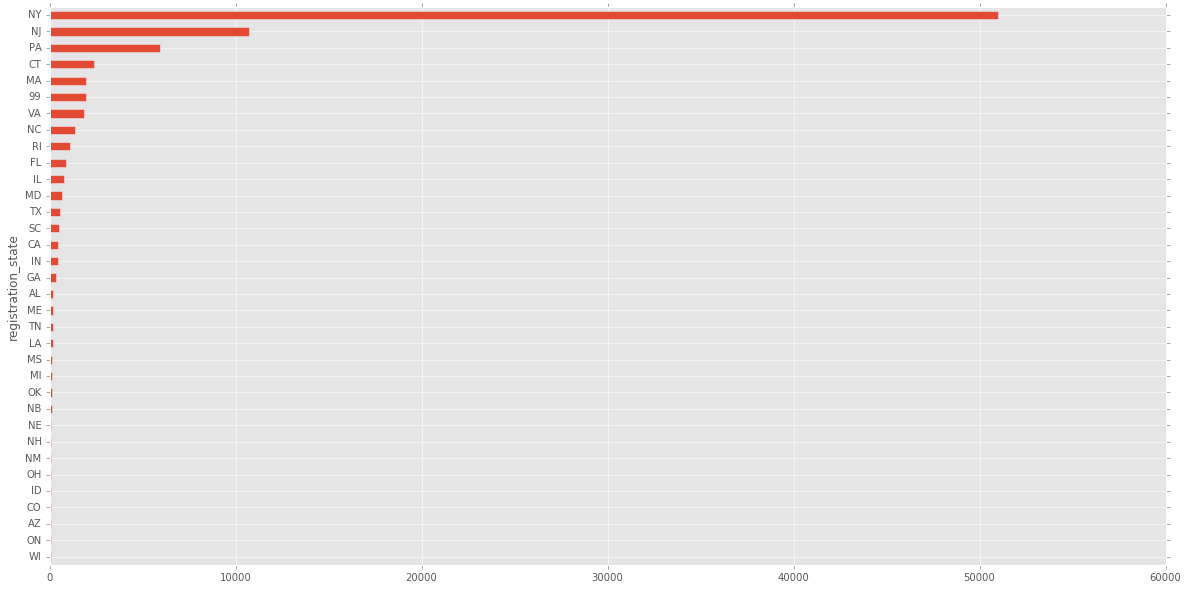

In [430]:
combined_df.groupby(by='registration_state')['manhattan_cleaned_fines'].sum().sort_values().plot(kind='barh', figsize=(20,10))

## 12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.

In [431]:
type(combined_df['violation_time'][0])

datetime.time

In [432]:
print(combined_df['violation_time'][0])

07:52:00


In [433]:
combined_df['violation_time'][0].hour

7

In [434]:
def time_to_hour(value):
    try:
        return value.hour
    except:
        pass

In [435]:
combined_df["violation_hour"] = combined_df['violation_time'].apply(time_to_hour)
combined_df.head(3)

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code,code,definition,manhattan_below_96,all_other_areas,manhattan_cleaned_fines,violation_hour
0,1283294138,GBB9093,NY,NaN,2013-08-04,07:52:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,7.0
1,1283294151,62416MB,NY,NY,2013-08-04,12:40:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,12.0
2,1283294163,78755JZ,NY,NY,2013-08-05,12:43:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,12.0


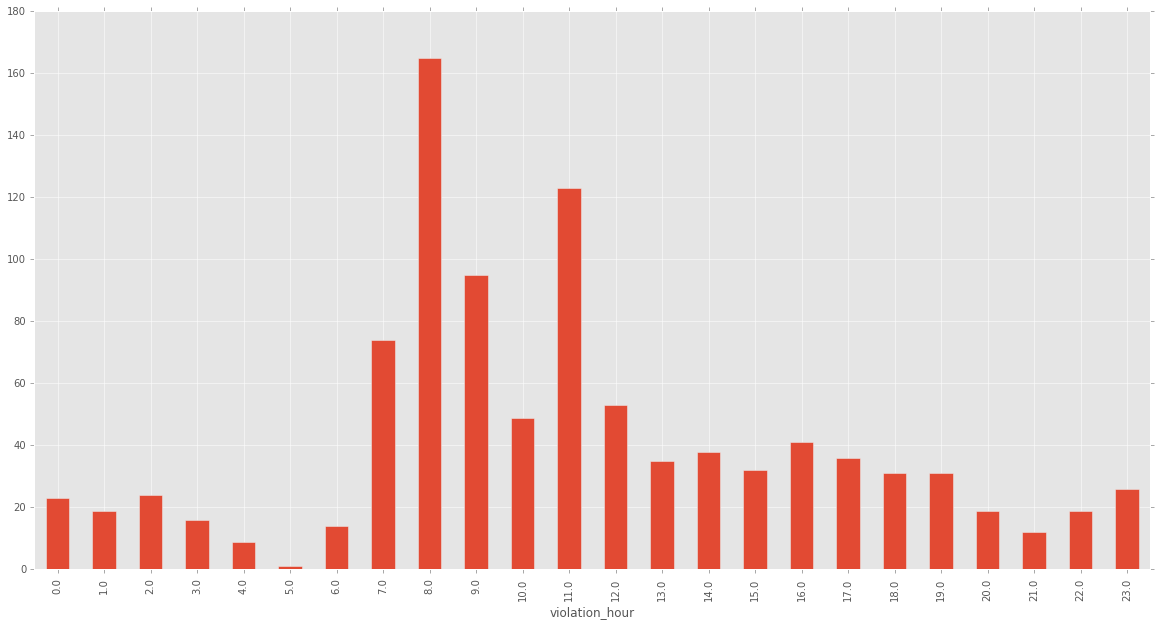

In [448]:
combined_df.groupby('violation_hour').count()['summons_number'].plot(kind="bar", figsize=(20,10))

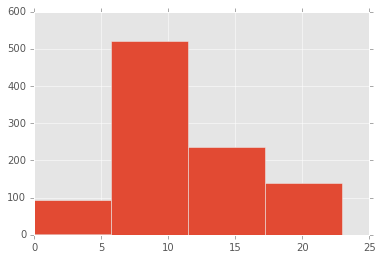

In [452]:
combined_df['violation_hour'].hist(bins=4)

## 13. What's the average ticket cost in NYC?

In [303]:
number_of_all_tickets = combined_df['manhattan_below_96'].count()
number_of_all_tickets

989

In [304]:
# taking the total money NYC makes from question 8  -- stored in variable "money_nyc"
average_ticket_cost = money_nyc/number_of_all_tickets
print("The average ticket cost in NYC is", round(average_ticket_cost), "US-dollar.")

The average ticket cost in NYC is 85.0 US-dollar.


## 14. Make a graph of the number of tickets per day.

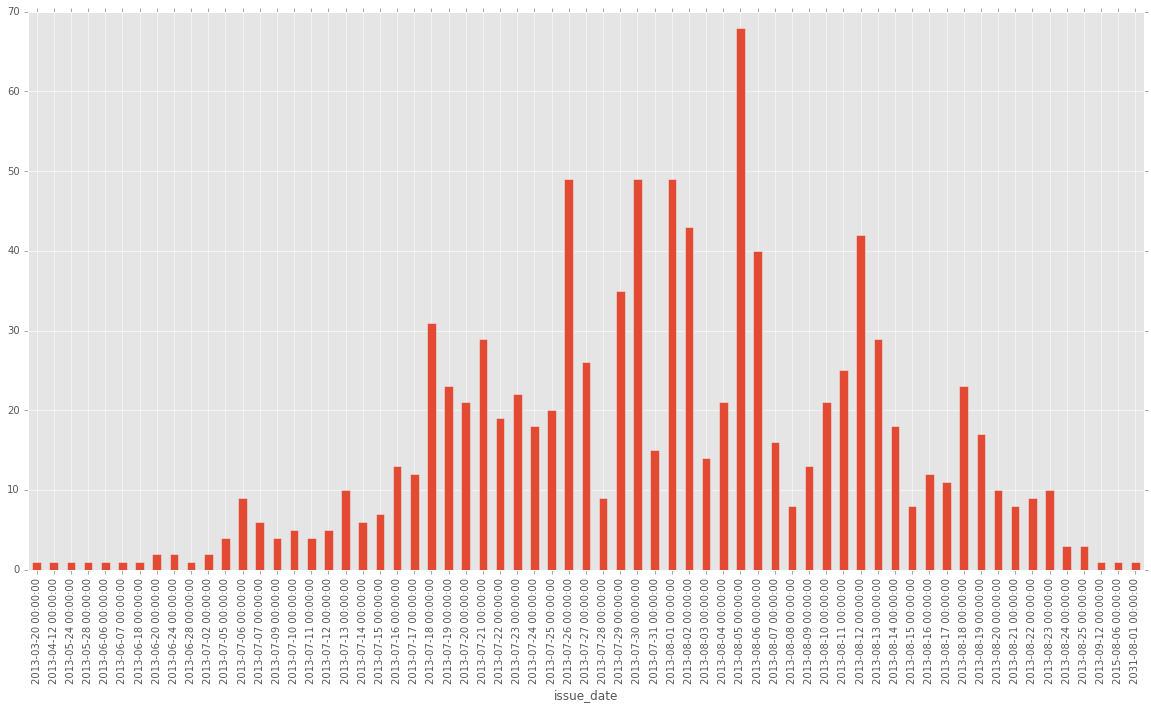

In [305]:
combined_df.groupby('issue_date').count()
combined_df.groupby('issue_date').count()['summons_number']
plt.style.use('ggplot')
combined_df.groupby('issue_date').count()['summons_number'].plot(kind='bar', figsize=(20,10))

## 15. Make a graph of the amount of revenue collected per day.

In [306]:
#groupby date, sum revenue

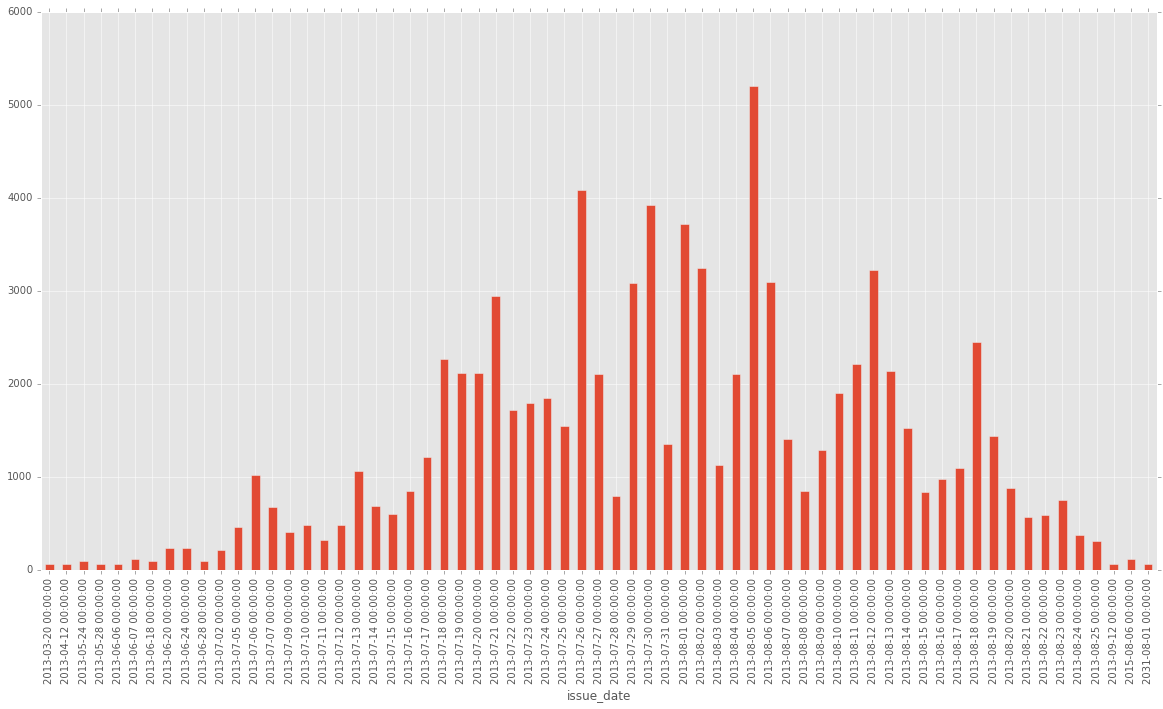

In [307]:
copy_df = combined_df
copy_df.index = copy_df['issue_date']

copy_df.groupby("issue_date")['manhattan_cleaned_fines'].sum().plot(kind='bar', figsize=(20,10))

In [308]:
type(dates_frame['issue_date'][0])

pandas.tslib.Timestamp

In [309]:
dates_frame

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code,code,definition,manhattan_below_96,all_other_areas,manhattan_fines,test,test2,manhattan_cleaned_fines
0,1283294138,GBB9093,NY,NaN,2013-08-04,07:52:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
1,1283294151,62416MB,NY,NY,2013-08-04,12:40:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
2,1283294163,78755JZ,NY,NY,2013-08-05,12:43:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
3,1283294175,63009MA,NY,NY,2013-08-05,14:32:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
4,1290834349,429J6JM,NY,Q,2013-07-23,10:37:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
5,1290834374,42587JW,NY,Q,2013-07-30,11:19:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
6,1291521665,YANKYJAM,NY,K,2013-07-02,19:42:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
7,1293030739,GHG2484,NY,Q,2013-08-11,01:30:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
8,1293100924,64195MC,NY,K,2013-06-20,15:44:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115
9,1293101151,54100JA,NY,NY,2013-07-05,13:15:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,YAY,115,115


In [310]:
dates_frame = combined_df[combined_df['issue_date'] == combined_df['issue_date']]
rashida = dates_frame.groupby('issue_date')
rashida.head()

,summons_number,plate_id,registration_state,violation_county,issue_date,violation_time,violation_code,code,definition,manhattan_below_96,all_other_areas,manhattan_cleaned_fines,violation_hour
issue_date,,,,,,,,,,,,,
2013-08-04,1283294138,GBB9093,NY,NaN,2013-08-04,07:52:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,7.0
2013-08-04,1283294151,62416MB,NY,NY,2013-08-04,12:40:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,12.0
2013-08-05,1283294163,78755JZ,NY,NY,2013-08-05,12:43:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,12.0
2013-08-05,1283294175,63009MA,NY,NY,2013-08-05,14:32:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,14.0
2013-07-23,1290834349,429J6JM,NY,Q,2013-07-23,10:37:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,10.0
2013-07-30,1290834374,42587JW,NY,Q,2013-07-30,11:19:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,11.0
2013-07-02,1291521665,YANKYJAM,NY,K,2013-07-02,19:42:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,19.0
2013-08-11,1293030739,GHG2484,NY,Q,2013-08-11,01:30:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,1.0
2013-06-20,1293100924,64195MC,NY,K,2013-06-20,15:44:00,46,46,Standing or parking on the roadway side of a v...,115,115,115,15.0


In [311]:
dates_frame = combined_df[combined_df['issue_date'] == combined_df['issue_date']]
by_date = dates_frame.groupby('issue_date')
type(by_date)
[date[0] for date in by_date["issue_date"]]
# [date for date in dates_frame["issue_date"]]

[Timestamp('2013-03-20 00:00:00'),
 Timestamp('2013-04-12 00:00:00'),
 Timestamp('2013-05-24 00:00:00'),
 Timestamp('2013-05-28 00:00:00'),
 Timestamp('2013-06-06 00:00:00'),
 Timestamp('2013-06-07 00:00:00'),
 Timestamp('2013-06-18 00:00:00'),
 Timestamp('2013-06-20 00:00:00'),
 Timestamp('2013-06-24 00:00:00'),
 Timestamp('2013-06-28 00:00:00'),
 Timestamp('2013-07-02 00:00:00'),
 Timestamp('2013-07-05 00:00:00'),
 Timestamp('2013-07-06 00:00:00'),
 Timestamp('2013-07-07 00:00:00'),
 Timestamp('2013-07-09 00:00:00'),
 Timestamp('2013-07-10 00:00:00'),
 Timestamp('2013-07-11 00:00:00'),
 Timestamp('2013-07-12 00:00:00'),
 Timestamp('2013-07-13 00:00:00'),
 Timestamp('2013-07-14 00:00:00'),
 Timestamp('2013-07-15 00:00:00'),
 Timestamp('2013-07-16 00:00:00'),
 Timestamp('2013-07-17 00:00:00'),
 Timestamp('2013-07-18 00:00:00'),
 Timestamp('2013-07-19 00:00:00'),
 Timestamp('2013-07-20 00:00:00'),
 Timestamp('2013-07-21 00:00:00'),
 Timestamp('2013-07-22 00:00:00'),
 Timestamp('2013-07-

In [312]:
# group by date, sum fines per day

dates_frame = combined_df[combined_df['issue_date'] == combined_df['issue_date']]
by_date = dates_frame.groupby('issue_date')

by_dates_list = []
for value in by_date['manhattan_below_96'].sum():
    cleaned_value_list = value.replace("(Regular Tow, plus violation fine)", "").replace("vary", "").split()
    revenue_int_list = [int(value) for value in cleaned_value_list]
    revenue_sum = sum(revenue_int_list)
    individual_date = [date[0] for date in by_date["issue_date"]]
    date_dict={'date': "individual_date", 'revenue': revenue_sum}
    by_dates_list.append(date_dict)

by_dates_list

[{'date': 'individual_date', 'revenue': 65},
 {'date': 'individual_date', 'revenue': 65},
 {'date': 'individual_date', 'revenue': 95},
 {'date': 'individual_date', 'revenue': 65},
 {'date': 'individual_date', 'revenue': 65},
 {'date': 'individual_date', 'revenue': 115},
 {'date': 'individual_date', 'revenue': 95},
 {'date': 'individual_date', 'revenue': 230},
 {'date': 'individual_date', 'revenue': 230},
 {'date': 'individual_date', 'revenue': 95},
 {'date': 'individual_date', 'revenue': 210},
 {'date': 'individual_date', 'revenue': 460},
 {'date': 'individual_date', 'revenue': 1015},
 {'date': 'individual_date', 'revenue': 670},
 {'date': 'individual_date', 'revenue': 400},
 {'date': 'individual_date', 'revenue': 485},
 {'date': 'individual_date', 'revenue': 320},
 {'date': 'individual_date', 'revenue': 485},
 {'date': 'individual_date', 'revenue': 1060},
 {'date': 'individual_date', 'revenue': 690},
 {'date': 'individual_date', 'revenue': 595},
 {'date': 'individual_date', 'revenue':

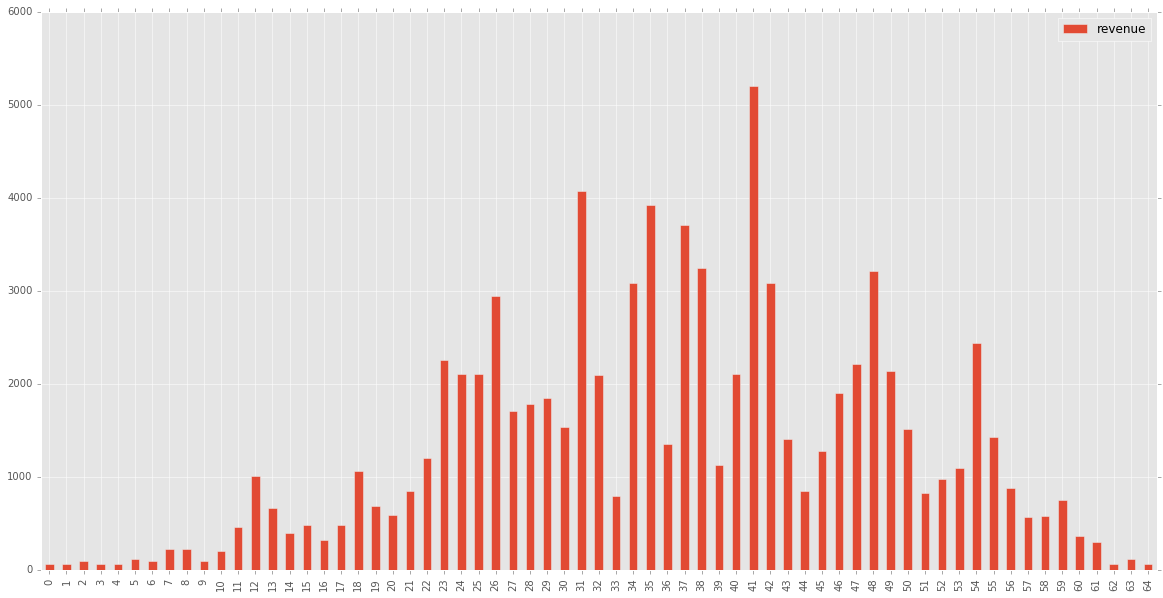

In [313]:
by_dates_df = pd.DataFrame(by_dates_list)
by_dates_df.plot(kind='bar', figsize=(20,10))

## 16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.

In [314]:
licensed_drivers = pd.read_csv("licensed_drivers.csv")
selection_licensed = licensed_drivers.tail(5)[["County", "Total"]]
selection_licensed

,County,Total
59,Bronx,456847
60,Brooklyn,983769
61,New York,748583
62,Queens,1134064
63,Staten Island,304250


In [315]:
abbreviation = [{'state': "Staten Island", 'abbreviation': "K"}, {'state': "Brooklyn", 'abbreviation': "R"}, {'state':"Queens", 'abbreviation':"Q"}, {'state':"Bronx", 'abbreviation': "BX"}, {'state':"New York", 'abbreviation':"NY"}]
abbrev_table = pd.DataFrame(abbreviation)
abbrev_table

,abbreviation,state
0,K,Staten Island
1,R,Brooklyn
2,Q,Queens
3,BX,Bronx
4,NY,New York


In [316]:
joined_table = abbrev_table.merge(selection_licensed, left_on="state", right_on="County")
licensed_df = joined_table[['County', 'abbreviation', 'Total']]
licensed_df.columns = ("borough name", "abbreviation", "number of licensed drivers")
licensed_df

,borough name,abbreviation,number of licensed drivers
0,Staten Island,K,304250
1,Brooklyn,R,983769
2,Queens,Q,1134064
3,Bronx,BX,456847
4,New York,NY,748583


## 17. What's the parking-ticket-cost-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [317]:
#1) Get total violation cost per borough
#2) Divide it by number of licensed drivers

In [318]:
df_17 = combined_df[['summons_number', 'violation_county', 'manhattan_below_96', 'all_other_areas']]
df_17

,summons_number,violation_county,manhattan_below_96,all_other_areas
issue_date,,,,
2013-08-04,1283294138,NaN,115,115
2013-08-04,1283294151,NY,115,115
2013-08-05,1283294163,NY,115,115
2013-08-05,1283294175,NY,115,115
2013-07-23,1290834349,Q,115,115
2013-07-30,1290834374,Q,115,115
2013-07-02,1291521665,K,115,115
2013-08-11,1293030739,Q,115,115
2013-06-20,1293100924,K,115,115


In [319]:
fine_dict_list = []
def get_fines(a,b):
    viol = df_17[df_17['violation_county'] == a]
    fines = viol[b]

    fines_list = []
    for fine in fines:
        try:
            fines_list.append(int(fine))
        except:
            continue
    fine_per_borough = sum(fines_list)
    dict_fines = {'state': a, 'total_fines_in_borough': fine_per_borough}
    fine_dict_list.append(dict_fines)

fines_per_borough = fine_dict_list

get_fines('NY', 'manhattan_below_96')
get_fines('K', 'all_other_areas')
get_fines('BX', 'all_other_areas')
get_fines('R', 'all_other_areas')
get_fines('Q', 'all_other_areas')

In [320]:
fines_per_borough

[{'state': 'NY', 'total_fines_in_borough': 26000},
 {'state': 'K', 'total_fines_in_borough': 21830},
 {'state': 'BX', 'total_fines_in_borough': 6650},
 {'state': 'R', 'total_fines_in_borough': 1840},
 {'state': 'Q', 'total_fines_in_borough': 16755}]

In [321]:
borough_fines = pd.DataFrame(fines_per_borough)

In [322]:
joined_df = licensed_df.merge(borough_fines, left_on="abbreviation", right_on="state")
joined_df

,borough name,abbreviation,number of licensed drivers,state,total_fines_in_borough
0,Staten Island,K,304250,K,21830
1,Brooklyn,R,983769,R,1840
2,Queens,Q,1134064,Q,16755
3,Bronx,BX,456847,BX,6650
4,New York,NY,748583,NY,26000


In [323]:
joined_df['parking-ticket-cost-per-licensed-driver'] = joined_df['total_fines_in_borough'] / joined_df['number of licensed drivers']

In [324]:
joined_df

,borough name,abbreviation,number of licensed drivers,state,total_fines_in_borough,parking-ticket-cost-per-licensed-driver
0,Staten Island,K,304250,K,21830,0.071750
1,Brooklyn,R,983769,R,1840,0.001870
2,Queens,Q,1134064,Q,16755,0.014774
3,Bronx,BX,456847,BX,6650,0.014556
4,New York,NY,748583,NY,26000,0.034732


Either my calculation went wrong somewhere or the fines are collected just by a very few drivers.